In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [2]:
listings = pd.read_csv('data/listings_interm_with_zips.csv')

In [3]:
listings.head(3)

url  \
0  https://www.renthop.com/listings/141-east-56th...   
1  https://www.renthop.com/listings/382-wadsworth...   
2  https://www.renthop.com/listings/301-east-38-s...   

                         address  \
0  141 East 56th Street, Apt 11A   
1      382 Wadsworth Ave, Apt 4B   
2    301 East 38 Street, Apt 16I   

                                        neighborhood  rent  beds  baths  \
0         Midtown East, Midtown Manhattan, Manhattan  4925     2    1.0   
1  Fort George, Washington Heights, Upper Manhatt...  4195     5    2.0   
2          Murray Hill, Midtown Manhattan, Manhattan  2775     1    1.0   

   flexs    zip  
0    0.0  10022  
1    0.0  10040  
2    0.0  10016

In [4]:
listings.describe()

rent        beds       baths       flexs           zip
count    835.000000  835.000000  835.000000  835.000000    835.000000
mean    3567.852695    1.525749    1.253892    0.235928  10412.016766
std     2466.133792    1.098395    0.507350    0.793047    550.190061
min      710.000000    0.000000    1.000000    0.000000  10001.000000
25%     2350.000000    1.000000    1.000000    0.000000  10019.000000
50%     2979.000000    1.000000    1.000000    0.000000  10034.000000
75%     4095.000000    2.000000    1.000000    0.000000  11206.000000
max    37500.000000    5.000000    4.000000    6.000000  11435.000000

In [5]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835 entries, 0 to 834
Data columns (total 8 columns):
url             835 non-null object
address         835 non-null object
neighborhood    835 non-null object
rent            835 non-null int64
beds            835 non-null int64
baths           835 non-null float64
flexs           835 non-null float64
zip             835 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 52.3+ KB


#### Missing Values

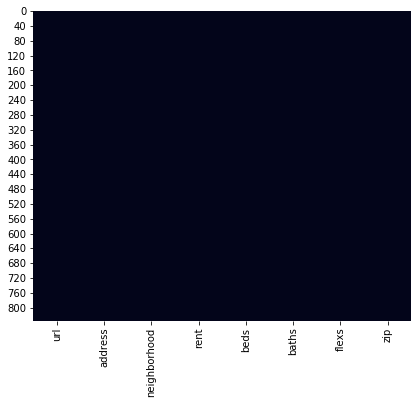

In [6]:
_ = sns.heatmap(listings.isnull(), cbar=False)
plt.subplots_adjust(right=1, top = 1.2)

### Number of listings in different neighborhood

In [7]:
# Groupby 

series =  listings.groupby('neighborhood')['rent'].count()
nhood_listings_number = series.to_frame('count').sort_values(by='count', ascending = False)
nhood_listings_number.head(10)
# listings.groupby('neighborhood')['rent'].count().to_frame('count').sort_values(by='count', ascending=False)

count
neighborhood                                             
Hell's Kitchen, Midtown Manhattan, Manhattan           64
Financial District, Downtown Manhattan, Manhattan      48
Hamilton Heights, West Harlem, Upper Manhattan,...     38
Bedford-Stuyvesant, Northern Brooklyn, Brooklyn        36
Crown Heights, Central Brooklyn, Brooklyn              36
Upper East Side, Upper Manhattan, Manhattan            33
Upper West Side, Upper Manhattan, Manhattan            28
Yorkville, Upper East Side, Upper Manhattan, Ma...     25
Bushwick, Northern Brooklyn, Brooklyn                  24
Murray Hill, Midtown Manhattan, Manhattan              23

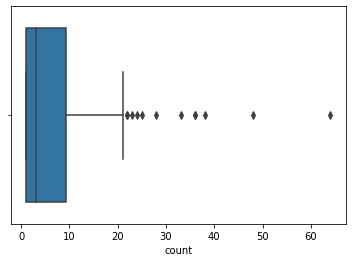

In [8]:
_ = sns.boxplot(nhood_listings_number['count'])

Most listings are in Manhattan

### Looking at upper East side of Manhattan 

https://en.wikipedia.org/wiki/Upper_East_Side

In [9]:
listings['neighborhood'].str.contains('Upper East Side').value_counts()

False    773
True      62
Name: neighborhood, dtype: int64

In [10]:
listings[listings['neighborhood'].str.contains('Upper East Side')]\
.head(1)

url  \
10  https://www.renthop.com/listings/405-east-75th...   

                         address                                 neighborhood  \
10  404 East 75th Street, Apt 3B  Upper East Side, Upper Manhattan, Manhattan   

    rent  beds  baths  flexs    zip  
10  2200     1    1.0    0.0  10021

In [11]:
listings[listings['neighborhood'].str.contains('Upper East Side')]['neighborhood']\
.head(3)

10          Upper East Side, Upper Manhattan, Manhattan
13          Upper East Side, Upper Manhattan, Manhattan
15    Yorkville, Upper East Side, Upper Manhattan, M...
Name: neighborhood, dtype: object

In [12]:
listings[listings['neighborhood'].str.contains('Upper East Side')]['neighborhood'].value_counts()

Upper East Side, Upper Manhattan, Manhattan                   33
Yorkville, Upper East Side, Upper Manhattan, Manhattan        25
Lenox Hill, Upper East Side, Upper Manhattan, Manhattan        2
Carnegie Hill, Upper East Side, Upper Manhattan, Manhattan     2
Name: neighborhood, dtype: int64

#### Mean Rent At the Neighborhoods:

In [13]:
mean_rents_manhat_nhood = listings.groupby('neighborhood')['rent'].mean().to_frame('mean').sort_values(by='mean')

In [14]:
mean_rents_manhat_nhood= mean_rents_manhat_nhood.reset_index()
mean_rents_manhat_nhood.head()

neighborhood    mean
0             Briarwood, Southeastern Queens, Queens  1400.0
1  Weeksville, Crown Heights, Central Brooklyn, B...  1680.0
2  New Lots, East New York, Eastern Brooklyn, Bro...  1750.0
3                              Getty Square, Yonkers  1750.0
4  Homecrest, Sheepshead Bay, Southern Brooklyn, ...  1790.0

Lenox Hill have highest rent. Whereas, Briarwood, Southeastern Queens is cheapest

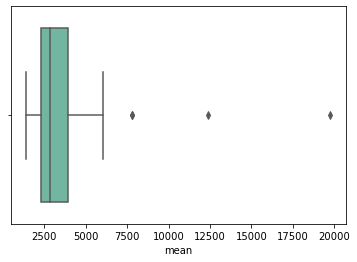

In [15]:
_ = sns.boxplot(mean_rents_manhat_nhood['mean'],palette="Set2")

### Looking By Zip Codes

In [16]:
rent_by_zip_mean = listings.groupby('zip')['rent'].mean().to_frame('avg_rent').sort_values(by='avg_rent', ascending=False).reset_index() 
rent_by_zip_mean.head(3)

zip      avg_rent
0  10065  11615.833333
1  10023   7115.650000
2  10017   5530.076923

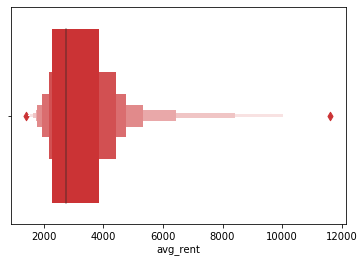

In [17]:
_ = sns.boxenplot(rent_by_zip_mean['avg_rent'],palette="Set1")

10065 , Lenox Hill have highest rent 

#### Visualizing Map

In [28]:
open(r'data/schoolDistricts.json').read()[0:2000]

'{"type":"FeatureCollection","crs":{"type":"name","properties":{"name":"EPSG:4326"}},"features":[{"type":"Feature","id":1,"geometry":{"type":"Polygon","coordinates":[[[-73.8205005943634,40.8010197479856],[-73.8204059436285,40.8006477808921],[-73.8203937074062,40.8006536416275],[-73.8203782670089,40.8006622348982],[-73.8203603958741,40.8006711587593],[-73.8203415548403,40.8006798812483],[-73.8203271270739,40.8006864775147],[-73.8203114693555,40.8006923525088],[-73.8202980146079,40.8006986438847],[-73.8202828238847,40.8007071025065],[-73.8202636942769,40.8007170421061],[-73.8202470607303,40.800724255269],[-73.8202248222852,40.8007317404608],[-73.8202096728979,40.8007379479337],[-73.8201940130654,40.8007444340405],[-73.8201774176512,40.8007508280546],[-73.8201632054123,40.8007564617017],[-73.8201492879827,40.8007628873637],[-73.8201306557646,40.8007732048165],[-73.8201163957825,40.8007832052629],[-73.8201020614665,40.8007952586128],[-73.8200822652543,40.8008107070458],[-73.8200707275134,4

In [29]:
import folium 
 
m = folium.Map(location=[40.748817, -73.985428], zoom_start=13) 
 
folium.Choropleth( 
    geo_data=open(r'data\schoolDistricts.json').read(), 
    data=rent_by_zip_mean, 
    columns=['zip', 'avg_rent'], 
    key_on='feature.properties.SchoolDist', 
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    ).add_to(m) 
 
m 

In [20]:
import folium 
 
m = folium.Map(location=[40.748817, -73.985428], zoom_start=13) 
 
folium.Choropleth( 
    geo_data=open(r'data\nyc.geojson').read(), 
    data=rent_by_zip_mean, 
    columns=['zip', 'avg_rent'], 
    key_on='feature.properties.postalCode', 
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    ).add_to(m) 
 
m 